In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
from scipy import signal

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# modify this so it matches your own path to mit dropbox!

base = '/Users/daphne/Dropbox (MIT)/'

In [3]:
# clinical

path = base + "pd-mlhc/CIS/clinical_data/CIS-PD_Demographics.csv"
demo = pd.read_csv(path)

path = base + "pd-mlhc/CIS/clinical_data/CIS-PD_UPDRS_Part1_2_4.csv"
updrs124 = pd.read_csv(path)

path = base + "pd-mlhc/CIS/clinical_data/CIS-PD_UPDRS_Part3.csv"
updrs3 = pd.read_csv(path)

In [7]:
# load in labels

path = base + "pd-mlhc/CIS/data_labels/CIS-PD_Training_Data_IDs_Labels.csv"
 
labels = pd.read_csv(path)

labels.head()

,measurement_id,subject_id,on_off,dyskinesia,tremor
0,cc7b822c-e310-46f0-a8ea-98c95fdb67a1,1004,1.0,1.0,1.0
1,5163afe8-a6b0-4ea4-b2ba-9b4501dd5912,1004,0.0,0.0,0.0
2,5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a,1004,1.0,1.0,1.0
3,fb188ae2-2173-4137-9236-19a137a402c2,1004,3.0,3.0,3.0
4,19a3e9ea-fce1-40b7-9457-2618970beb7b,1004,1.0,1.0,1.0


In [8]:
# load in a random example
wh = int((labels.shape[0]-1)*np.random.rand())

chosen = labels['measurement_id'].iloc[wh] + '.csv'

path = '/Users/daphne/Dropbox (MIT)/pd-mlhc/CIS/training_data/' + chosen

ex = pd.read_csv(path)

print(labels.iloc[wh])

measurement_id    b34c12f1-1927-4d6b-b936-d0328aed05a7
subject_id                                        1004
on_off                                               1
dyskinesia                                           1
tremor                                               0
Name: 58, dtype: object


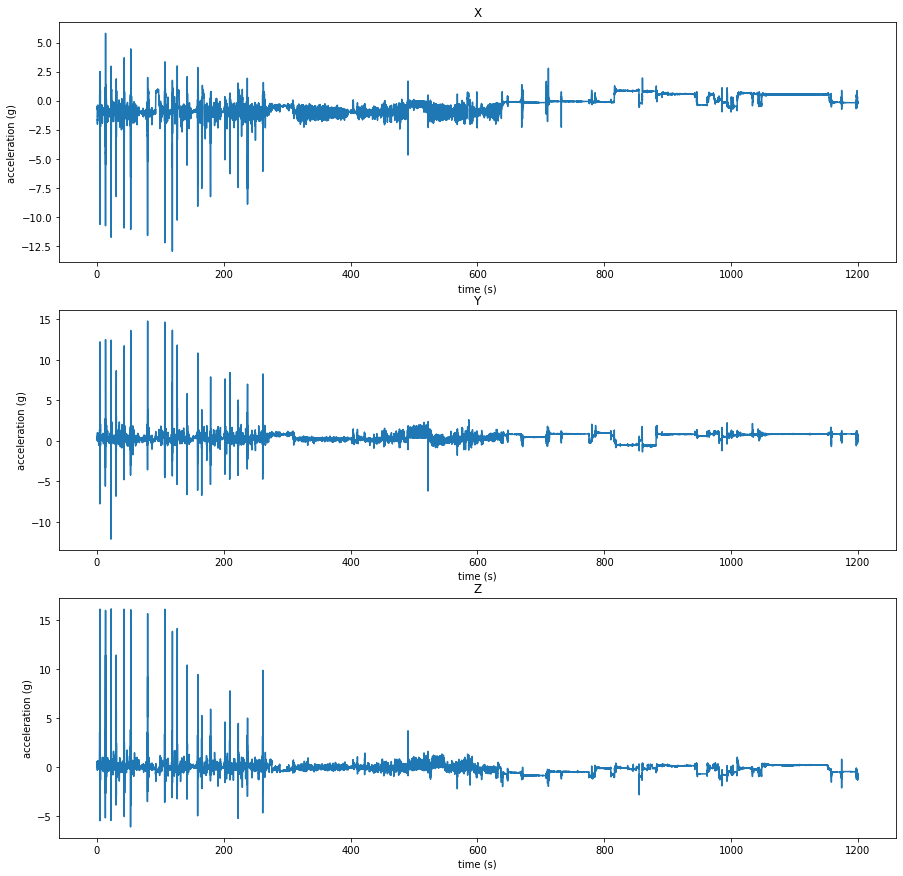

In [9]:
plt.figure(figsize=[15,15]);

nm = ['X','Y','Z']

for i in range(3) :
    plt.subplot(3,1,i+1)
    plt.plot(ex['Timestamp'],ex[nm[i]])
    plt.xlabel('time (s)')
    plt.ylabel('acceleration (g)')
    plt.title(nm[i])

In [10]:
# let's try some random stuff

# the magnitude of the acceleration vector
# then look at various metrics on that wrt labels

mag = []

for i in range(labels.shape[0]) :
    chosen = labels['measurement_id'].iloc[i] + '.csv'
    path = base + 'pd-mlhc/CIS/training_data/' + chosen
    df = pd.read_csv(path)
    mag.append(np.sqrt(np.array(df['X'])**2 + np.array(df['Y'])**2 + np.array(df['Z']**2)))

In [17]:
mag_m = [np.mean(m) for m in mag]
std_m = [np.sqrt(np.var(m)) for m in mag]

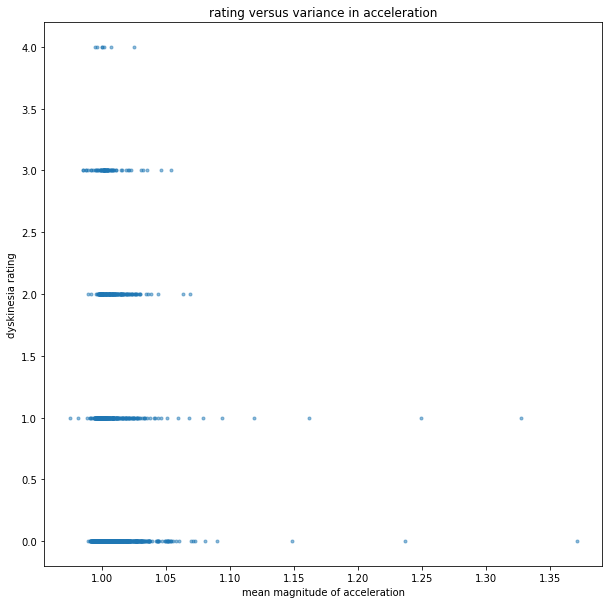

In [12]:
# not much to see here
plt.figure(figsize=[10,10])
plt.plot(mag_m,labels['dyskinesia'],'.', alpha=0.5)
plt.xlabel('mean magnitude of acceleration')
plt.ylabel('dyskinesia rating')
plt.title('rating versus variance in acceleration');

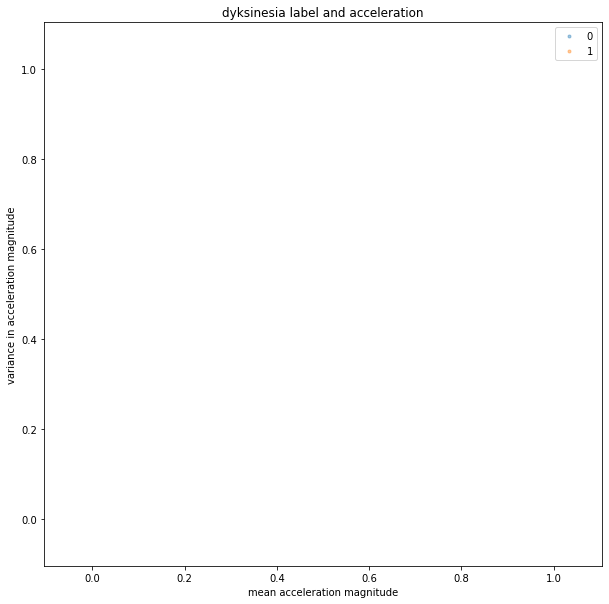

In [18]:
labs = labels['dyskinesia']

labs = [i > 1 for i in labs]

plt.figure(figsize=[10,10])
for i in range(int(max(labs))+1) :
    plt.plot(np.array(mag_m)[np.where(labs==i)], np.array(std_m)[np.where(labs==i)], '.',alpha=0.4, label=i)
plt.xlabel('mean acceleration magnitude')
plt.ylabel('variance in acceleration magnitude')
plt.title('dyksinesia label and acceleration')
plt.legend();

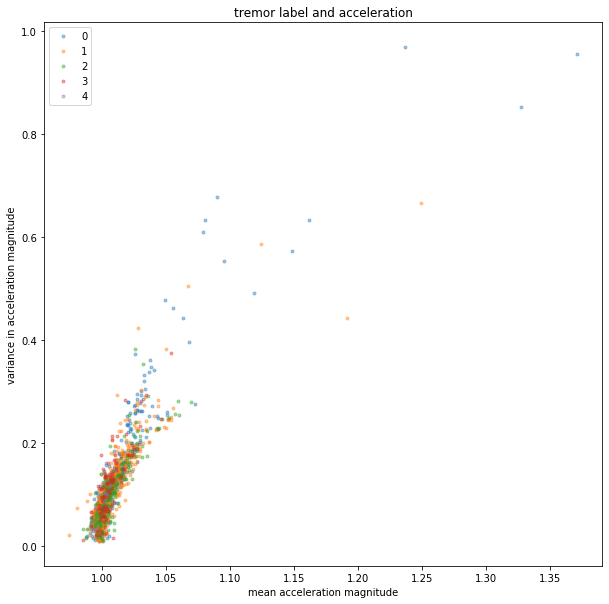

In [14]:
labs = labels['tremor']

plt.figure(figsize=[10,10])
for i in range(int(max(labs))+1) :
    plt.plot(np.array(mag_m)[np.where(labs==i)], np.array(std_m)[np.where(labs==i)], '.',alpha=0.4, label=i)
plt.xlabel('mean acceleration magnitude')
plt.ylabel('variance in acceleration magnitude')
plt.title('tremor label and acceleration')
plt.legend();

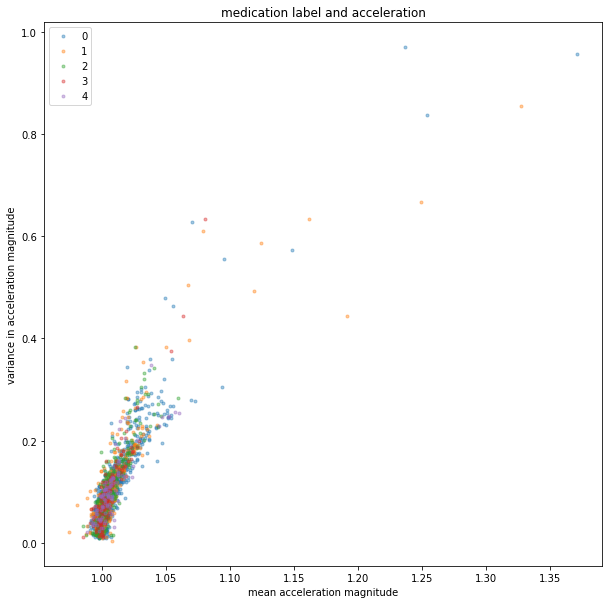

In [15]:
labs = labels['on_off']

plt.figure(figsize=[10,10])
for i in range(int(max(labs))+1) :
    plt.plot(np.array(mag_m)[np.where(labs==i)], np.array(std_m)[np.where(labs==i)], '.',alpha=0.4, label=i)
plt.xlabel('mean acceleration magnitude')
plt.ylabel('variance in acceleration magnitude')
plt.title('medication label and acceleration')
plt.legend();

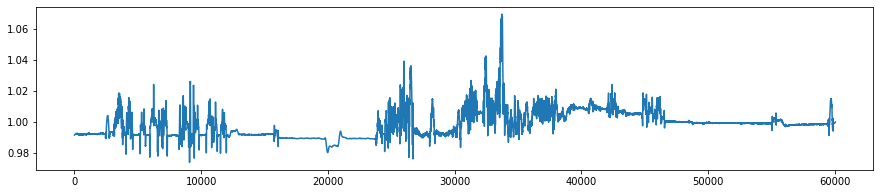

In [154]:
# not much to see in any of the above plots -- not too surprising. What else could we look at? SG filter? idk
# low pass filter would probably be more principled
plt.figure(figsize=[15,3])
plt.plot(signal.savgol_filter(mag[75], 301, 3));